# Scikit-learn


In this tutorial, we will build a model with the Python [`scikit-learn`](https://scikit-learn.org/stable/) module. Additionally, you will learn how to create a data preprocessing pipline.

# Data preparation

In [2]:
# See section "Data" for details about data preprocessing
from case_duke_data_prep import *
df

,price,bed,bath,area,year_built,cooling,lot
0,1520000,3,4.0,6040,1972,central,0.97
1,1030000,5,4.0,4475,1969,central,1.38
2,420000,2,3.0,1745,1959,central,0.51
3,680000,4,3.0,2091,1961,central,0.84
4,428500,4,3.0,1772,2020,central,0.16
...,...,...,...,...,...,...,...
93,541000,4,4.0,2740,1960,central,0.51
94,473000,3,3.0,2171,1955,other,0.61
95,490000,4,4.0,2972,1984,central,0.65
96,815000,4,4.0,3904,1970,other,1.47


## Data preprocessing pipeline

In [3]:
# Modules
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
# for numeric features
# we use Pipeline(), SimpleImputer with median
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])
    ## Imputer ersetzt leere Zellen --> hier mit dem Median
    ## scaler bringt alle Werte in einen einheitlichen Wertebereich

In [5]:
# for categorical features  
# use OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    ##onehot wandelt variable in binäres format --> scikit learn erwartet categoriale Werte binär


In [6]:
# Pipeline
# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
        ])
    ## ColumnTransformer wird dazu verwendet Spalten zu transformieren



# Simple regression

In [7]:
# Select features for simple regression
features = ['area']
X = df[features]

# Create response
y = df["price"]

In [8]:
# check feature
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    97 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [9]:
# check label
y

0     1520000
1     1030000
2      420000
3      680000
4      428500
       ...   
93     541000
94     473000
95     490000
96     815000
97     674500
Name: price, Length: 97, dtype: int64

In [10]:
# check for missing values
print("Missing values X:",X.isnull().any(axis=1).sum())

print("Missing values Y:",y.isnull().sum())

Missing values X: 0
Missing values Y: 0


## Data splitting

In [12]:
from sklearn.model_selection import train_test_split

# Train Test Split
# Use random_state to make this notebook's output identical at every run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,area
49,2902
71,2165
69,1094
15,2750
39,2334
...,...
61,2827
72,3047
14,3169
93,2740


## Modeling

In [13]:
from sklearn.linear_model import LinearRegression

# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [14]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002090DA73CD0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002090B6C8250>)])),
                ('lm', LinearRegression())])

In [15]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([128046.72300033])

## Evaluation with training data

There are various options to evaluate a model in scikit-learn. Review this overview about [metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [16]:
X_train.head()

,area
49,2902
71,2165
69,1094
15,2750
39,2334


In [17]:
y_pred = lm_pipe.predict(X_train)

In [18]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)  
## zeigt das es kein sehr gutes modell ist, da es nur zu ca 35 % Werte richtig vorhersagen kann

0.35694914972541525

In [19]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred)

29537647395.092514

In [20]:
# RMSE
mean_squared_error(y_train, y_pred, squared=False)

171865.20123367765

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_pred)
## durchschnittlicher absoluter Fehler der mit dem Modell gemacht wird

115668.27028304595

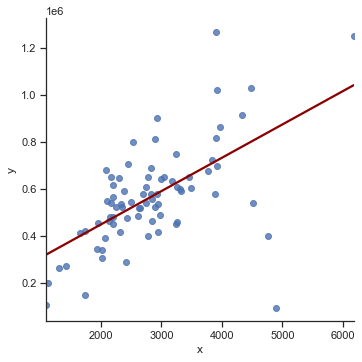

In [22]:
%matplotlib inline
import seaborn as sns 
sns.set_theme(style="ticks")

# Plot with Seaborn

# We first need to create a DataFrame
df_train = pd.DataFrame({'x': X_train['area'], 'y':y_train})

sns.lmplot(x='x', y='y', data=df_train, line_kws={'color': 'darkred'}, ci=False);
## wir erkennen das es ein paar streuwerte gibt die die daten evtl. verzerren --> regression diagnostics anwenden

In [29]:
import plotly.io as pio
import plotly.offline as py
import plotly.express as px

# Plot with Plotly Express
fig = px.scatter(x=X_train['area'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred');

fig.show()


AttributeError: module 'plotly.express' has no attribute 'scatter'

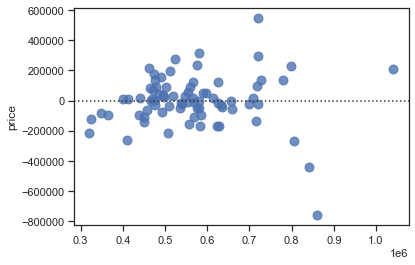

In [ ]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80});

Let's take a look at the wrongest predictions:

In [24]:
# create dataframe
df_error = pd.DataFrame(
    { "y": y_train,
      "y_pred": y_pred,
      "error": y_pred - y_train
    })

# sort by error, select top 10 and get index
error_index = df_error.sort_values(by=['error']).nlargest(10, 'error').index

# show corresponding data observations
df.iloc[error_index]

## das sind die Werte mit den größten Fehlern

,price,bed,bath,area,year_built,cooling,lot
65,609000,5,4.0,3175,2016,other,0.47
84,567000,4,4.0,3931,1982,other,0.39
88,480000,2,2.0,2203,1984,other,0.42
55,150000,3,1.0,1734,1945,other,0.16
19,290000,3,2.5,2414,1956,other,0.48
70,520000,4,3.0,2637,1968,other,0.65
16,452500,3,2.5,3234,1941,other,0.61
92,590000,5,3.0,3323,1980,other,0.43
48,416000,5,3.0,2949,1955,other,0.55
57,400000,4,3.0,2771,1958,central,0.52


## Evaluation with test data

In [25]:
y_pred = lm_pipe.predict(X_test)

In [26]:
print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MSE: 23209825917.07576
RMSE: 152347.7138557575


In [28]:
# Plot with Plotly Express
fig = px.scatter(x=X_test['area'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

fig.show()

NameError: name 'px' is not defined

Model generalization on unseen data (see [plotly documentation](https://plotly.com/python/ml-regression/))


In [ ]:
import numpy as np
import plotly.graph_objects as go

x_range = pd.DataFrame({ 'area': np.linspace(X_train['area'].min(), X_train['area'].max(), 100)})
y_range =  lm_pipe.predict(x_range)

go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range.area, y=y_range, name='prediction')
])


# Multiple regression

In [ ]:
# Select features for multiple regression
features= [
 'bed',
 'bath',
 'area',
 'year_built',
 'cooling',
 'lot'
  ]
X = df[features]

X.info()
print("Missing values:",X.isnull().any(axis = 1).sum())

# Create response
y = df["price"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   bed         97 non-null     int64   
 1   bath        97 non-null     float64 
 2   area        97 non-null     int64   
 3   year_built  97 non-null     int64   
 4   cooling     97 non-null     category
 5   lot         97 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 4.8 KB
Missing values: 0


In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [ ]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdb7e834040>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdb7e834070>)])),
                ('lm', LinearRegression())])

In [ ]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([ 37501.22436002,  50280.7007969 ,  30312.97805437,  27994.3520344 ,
        79024.39994917,  23467.73502737, -23467.73502737])

Evaluation with test data:

In [ ]:
y_pred = lm_pipe.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.4825836731448806